# K Nearest Neighbors com Python

Você recebeu um conjunto de dados classificados de uma empresa. Eles ocultaram a coluna de parâmetros, mas lhe deram os dados e a classe de destino.

Vamos tentar usar o KNN para criar um modelo que possa predizer diretamente a classe para um novo ponto de dados baseado nos parâmetros.

Vamos pegar e usá-lo!

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obter dados

Defina index_col = 0 para usar a primeira coluna como índice.

In [4]:
df = pd.read_csv('/media/felipe/SAMSUNG/LAPTOP RECENTE/felipe/Python3.7/udemyCOURSES/PythonParaDataScienceEMachineLearning/Python-Data-Science-and-Machine-Learning-Bootcamp/5. Machine Learning/K-Nearest-Neighbors/Classified Data', index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


#### O método de K Nearest Neighbors é útil em problemas de classificação em que os dados do problema não são claramente expostos, são anônimos. Mas com o método KNN podemos construir um modelo que consiga predizer as "TARGET CLASS" da tabela acima.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [7]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [8]:
len(df.columns)

11

## Normalizar as variáveis

Como o classificador KNN prediz a classe de uma determinada observação ao identificar as observações mais próximas, a escala da variável é importante. Todas as variáveis que estão em grande escala terão um efeito muito maior na distância entre as observações e, portanto, sobre o classificador KNN, do que as variáveis em pequena escala.

Ná prática, as colunas anônimas podem ter informações completamente diferentes em diferentes unidades. Para o método KNN, NORMALIZAÇÃO dos dados é FUNDAMENTAL. 

In [9]:
from sklearn.preprocessing import StandardScaler 

In [10]:
# A classe StandardScaler precisa ser inicializada em uma instância
Scaler = StandardScaler()

#### Agora temos que fitar o nosso DataFrame usando o Scaler, onde só devemos normalizar e padronizar os dados que atuam como parâmetros X, os quais são todas as colunas menos a coluna "TARGET CLASS" que representa a informação que queremos prever.

In [11]:
Scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
# Com isso podemos ter novos DataFrames ajustados e NORMALIZADOS
df_NORMALIZADO = Scaler.transform(df.drop('TARGET CLASS', axis=1))

In [13]:
df_NORMALIZADO

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

### Para podermos operar com a divisão de treino e teste com estes dados, é melhor criarmos um outro DataFrame de parâmetros que aparece como uma tabela e não um array.

In [14]:
df_parameters = pd.DataFrame(df_NORMALIZADO, columns=df.columns[:-1]) # queremos todas as colunas do df menos a última

In [15]:
df_parameters.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [17]:
# Agora o DataFrame array passou a ser um pandas
df_parameters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
WTT    1000 non-null float64
PTI    1000 non-null float64
EQW    1000 non-null float64
SBI    1000 non-null float64
LQE    1000 non-null float64
QWG    1000 non-null float64
FDJ    1000 non-null float64
PJF    1000 non-null float64
HQE    1000 non-null float64
NXJ    1000 non-null float64
dtypes: float64(10)
memory usage: 78.2 KB


## Divisão treino-teste

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(df_parameters, df['TARGET CLASS'], test_size = 0.3)

## Usando o KNN

### Lembre-se de que estamos tentando encontrar um modelo para prever se alguém estará na TARGET CLASS ou não. Começaremos com k = 1.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [22]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

## Previsões e avaliações

Vamos avaliar o nosso modelo KNN!

In [23]:
Predictions = KNN.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(Y_test, Predictions))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       141
           1       0.93      0.95      0.94       159

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [26]:
print(confusion_matrix(Y_test, Predictions))

[[129  12]
 [  8 151]]


# Escolhendo um valor melhor valor para K

Apesar do modelo que criamos acima com K=1 ter tido um bom desempenho com 93% de eficiência, nem sempre é assim. Resultados melhores podem ser obtidos com outros valores de K.

Vamos em frente e usar o método do cotovelo para escolher um bom Valor K:

#### The append() method in python adds a single item to the existing list. It doesn’t return a new list of items but will modify the original list by adding the item to the end of the list.

In [27]:
fruits = ['apple', 'banana', 'cherry']
fruits.append("orange")

In [28]:
fruits

['apple', 'banana', 'cherry', 'orange']

In [33]:
# Add a list to a list
a = ["apple", "banana", "cherry"]
b = ["Ford", "BMW", "Volvo"]
a.append(b)

In [34]:
print(a)

['apple', 'banana', 'cherry', ['Ford', 'BMW', 'Volvo']]


#### Vamos criar um método que vai iterar em valores de K variando de 1 a 50.

In [36]:
# Lista Error_rate

Error_rate = []

for i in range(1, 50):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, Y_train)
    Predictions = KNN.predict(X_test)
    Error_rate.append(np.mean(Predictions != Y_test))    # juntar a média aritmética dos valores em que a predição
                                                         # é diferente do Y_test  

In [37]:
Error_rate

[0.06666666666666667,
 0.07666666666666666,
 0.05,
 0.06,
 0.05333333333333334,
 0.06,
 0.05333333333333334,
 0.05,
 0.04666666666666667,
 0.05,
 0.04666666666666667,
 0.05333333333333334,
 0.05333333333333334,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05333333333333334,
 0.05,
 0.05333333333333334,
 0.05333333333333334,
 0.056666666666666664,
 0.04666666666666667,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.05333333333333334,
 0.05333333333333334,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.05,
 0.05,
 0.05]

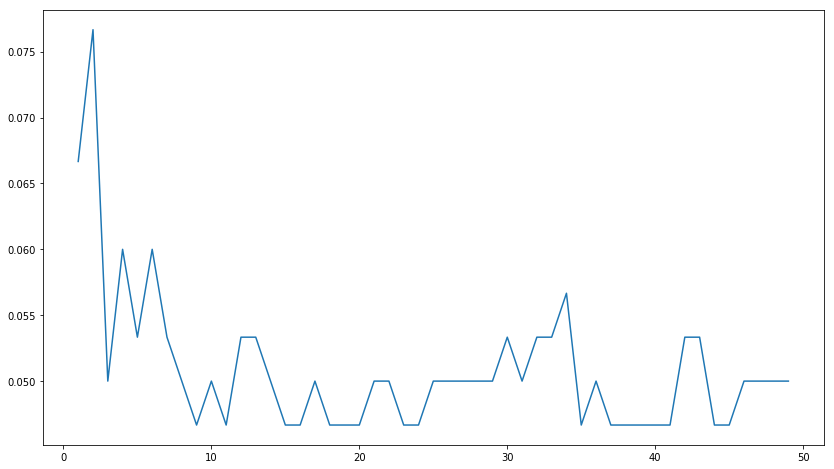

In [38]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 50), Error_rate)

Text(0, 0.5, 'Error Rate')

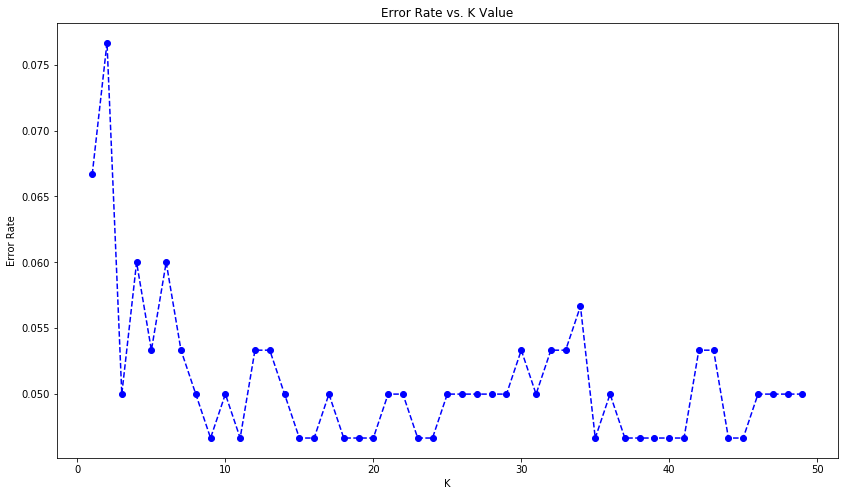

In [39]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 50), Error_rate, color='blue', linestyle='dashed', marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Notemos que para K=24, 41 ou 44 o modelo já convergiu para um mínimo na Error Rate. Portanto, não dá mais para otimizar o modelo aumentando o valor de K.

#### Vejamos os casos de K=20, K=24, K=42 e K=44.

In [45]:
KNN20 = KNeighborsClassifier(n_neighbors=20)
KNN20.fit(X_train, Y_train)
Predictions20 = KNN20.predict(X_test)
print(classification_report(Y_test, Predictions20))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       141
           1       0.94      0.97      0.96       159

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [42]:
KNN24 = KNeighborsClassifier(n_neighbors=24)
KNN24.fit(X_train, Y_train)
Predictions24 = KNN24.predict(X_test)
print(classification_report(Y_test, Predictions24))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       141
           1       0.94      0.97      0.96       159

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [43]:
KNN44 = KNeighborsClassifier(n_neighbors=44)
KNN44.fit(X_train, Y_train)
Predictions44 = KNN44.predict(X_test)
print(classification_report(Y_test, Predictions44))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       141
           1       0.94      0.97      0.96       159

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [44]:
KNN42 = KNeighborsClassifier(n_neighbors=42)
KNN42.fit(X_train, Y_train)
Predictions42 = KNN42.predict(X_test)
print(classification_report(Y_test, Predictions42))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       141
           1       0.93      0.97      0.95       159

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



#### Agora K=6

In [46]:
KNN6 = KNeighborsClassifier(n_neighbors=6)
KNN6.fit(X_train, Y_train)
Predictions6 = KNN.predict(X_test)
print(classification_report(Y_test, Predictions6))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       141
           1       0.93      0.97      0.95       159

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

